1. Set up

In [2]:
import numpy as np
import pickle
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import keras_tuner as kt
plt.style.use('ggplot')
plt.rcParams['axes.grid'] = False

In [8]:
# Load data
with open('./data/time_series_1.pickle', 'rb') as handle:
        time_series_1 = pickle.load(handle)
with open('./data/time_series_2.pickle', 'rb') as handle:
        time_series_2 = pickle.load(handle)
with open('./data/y.pickle', 'rb') as handle:
        y = pickle.load(handle)

In [12]:
time_series_1.shape

(4000, 5000)

In [13]:
time_series_2.shape

(4000, 5000)

In [16]:
y.shape

(4000,)

In [17]:
# Merge the 2 input time series
X = np.stack([time_series_1, time_series_2], axis=2)

In [18]:
X.shape

(4000, 5000, 2)

In [23]:
# Check the number of values in y
np.unique(y, return_counts=True)

(array([0., 1., 2., 3.]), array([1000, 1000, 1000, 1000]))

In [ ]:
for turbine_mode in set(y):
    # Take the first 3 samples from each turbine mode
    sample_turbine_mode_indices = np.argwhere(y == turbine_mode)[:3].squeeze()

    fig, axs = plt.subplots(3, 1, figsize=(15, 6))
    fig.suptitle(f'Sample sensor data for turbine mode {turbine_mode}')

    for row_num, sample_turbine_mode_index in enumerate(sample_turbine_mode_indices):
        plot_data = X[sample_turbine_mode_index]
        
        ax_to_plot = axs[row_num]

        ax_to_plot.plot(plot_data[:, 0].squeeze(), alpha=0.5)
        ax_to_plot.twinx()
        ax_to_plot.plot(plot_data[:, 1].squeeze(), alpha=0.5)

        ax_to_plot.get_xaxis().set_visible(False)

    plt.show()


In [33]:
for i in np.argwhere(y == 0)[:3]:
    print(i
          )

[3]
[6]
[12]


In [35]:
X[3].shape

(5000, 2)

In [60]:
# Plot mode = 0
turbine_mode_indices = np.argwhere(y == 1) [:5].squeeze()
turbine_mode_indices

array([ 0,  7, 10, 14, 15])

In [61]:
plot_X_mode0 = X[turbine_mode_indices]
plot_X_mode0

array([[[30, 84],
        [29, 72],
        [29, 93],
        ...,
        [36,  2],
        [35,  2],
        [50,  1]],

       [[30, 78],
        [29, 80],
        [29, 91],
        ...,
        [33,  0],
        [36,  0],
        [20,  0]],

       [[30, 73],
        [29, 74],
        [29, 86],
        ...,
        [38,  0],
        [32,  0],
        [29,  0]],

       [[27, 85],
        [28, 74],
        [28, 97],
        ...,
        [31,  0],
        [28,  0],
        [16,  0]],

       [[27, 78],
        [28, 79],
        [28, 90],
        ...,
        [31,  0],
        [21,  0],
        [17,  0]]], dtype=uint8)

In [64]:
plot_X_mode0.shape

(5, 5000, 2)

In [67]:
plot_data[:, 0].shape

(5, 2)

In [86]:
sample_turbine_mode_indices = np.argwhere(y == turbine_mode)[:3].squeeze()
sample_turbine_mode_indices

array([2, 5, 8])

In [85]:
X[sample_turbine_mode_indices].shape

(3, 5000, 2)

In [83]:
X[sample_turbine_mode_index].shape

(5000, 2)

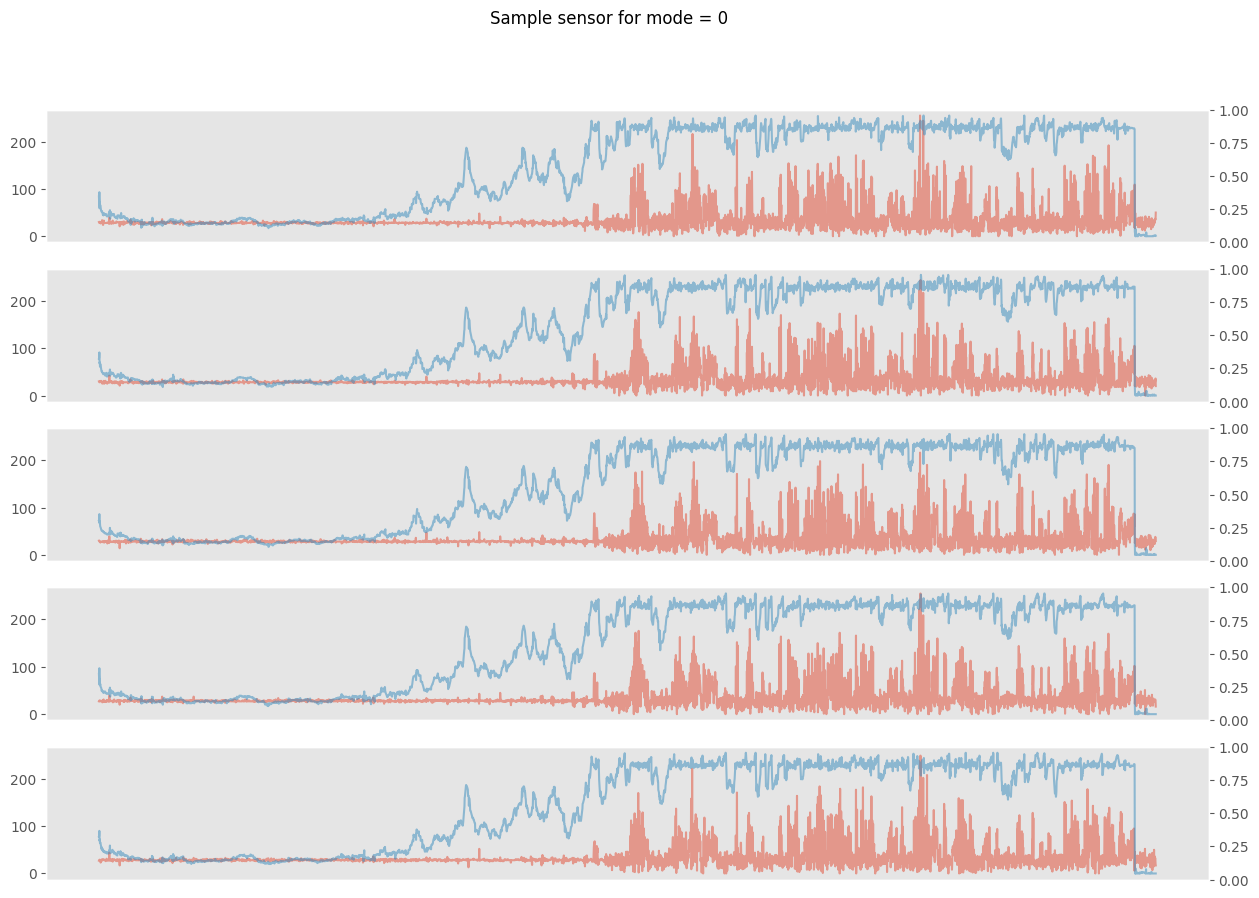

In [82]:
# plot
fig, axs = plt.subplots(5, 1, figsize = (15,10))
fig.suptitle('Sample sensor for mode = 0')

for row_num, sample_turbine_mode_index in enumerate(turbine_mode_indices):
    plot_data = X[sample_turbine_mode_index]
        
    ax_to_plot = axs[row_num]

    ax_to_plot.plot(plot_data[:, 0].squeeze(), alpha=0.5)
    ax_to_plot.twinx()
    ax_to_plot.plot(plot_data[:, 1].squeeze(), alpha=0.5)

    ax_to_plot.get_xaxis().set_visible(False)

plt.show()